ARIMA

In [44]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd

In [45]:
data = pd.read_csv("C:\\Users\\juanm\\Desktop\\Asignaturas\\Cuarto\\TFG\\Interfaz\\pantanos\\src-tauri\\Data\\Datasets\\AGUASCEBAS.csv", index_col=[0], parse_dates=True, dayfirst=True, names=["value"], header=0)

In [48]:
model = pm.auto_arima(
    df.value,
    start_p=1,
    start_q=1,
    test="adf",  # use adftest to find optimal 'd'
    max_p=3,
    max_q=3,  # maximum p and q
    m=1,  # frequency of series
    d=None,  # let model determine 'd'
    seasonal=False,  # No Seasonality
    start_P=0,
    D=0,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True,
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-10048.105, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=24097.559, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-10069.586, Time=0.54 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-10079.205, Time=0.88 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-10048.139, Time=2.78 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-10102.944, Time=1.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-10062.102, Time=0.69 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-10179.325, Time=1.57 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-10098.425, Time=0.86 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-10177.028, Time=2.30 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept 

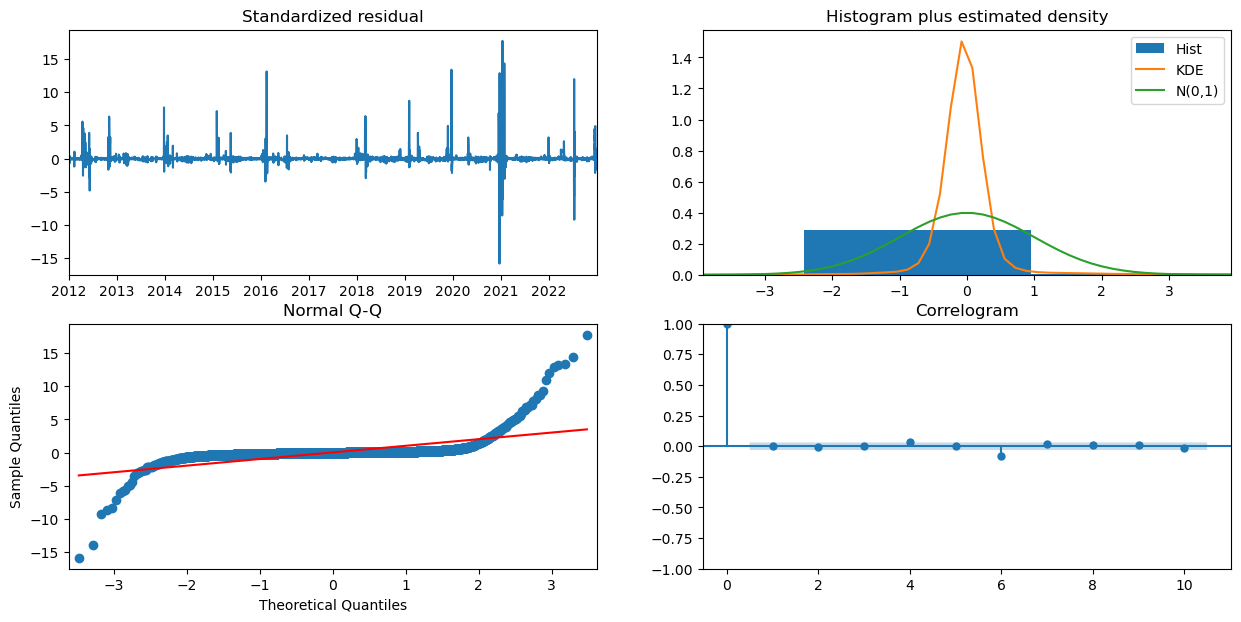

In [50]:
model.plot_diagnostics(figsize=(15,7))
plt.show()

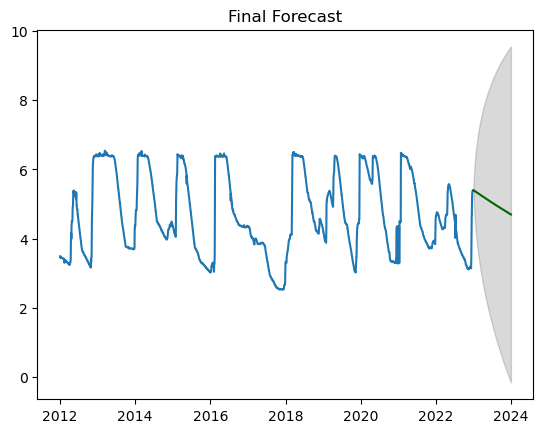

In [96]:
df.index = pd.DatetimeIndex(df.index)

# Forecast
n_periods = 365
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value) + n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc, color="darkgreen")
plt.fill_between(fc.index, lower_series, upper_series, color="k", alpha=0.15)

plt.title("Final Forecast")
plt.show()

SARIMA

In [101]:
data = pd.read_csv("C:\\Users\\juanm\\Desktop\\Asignaturas\\Cuarto\\TFG\\Interfaz\\pantanos\\src-tauri\\Data\\Datasets\\AGUASCEBAS.csv", index_col=[0], parse_dates=True, dayfirst=True)


In [102]:
train_size = int(len(df) * (((7*100)/11)/100))

train = df.iloc[:train_size]
test = df.iloc[train_size:]

test_size = len(test)

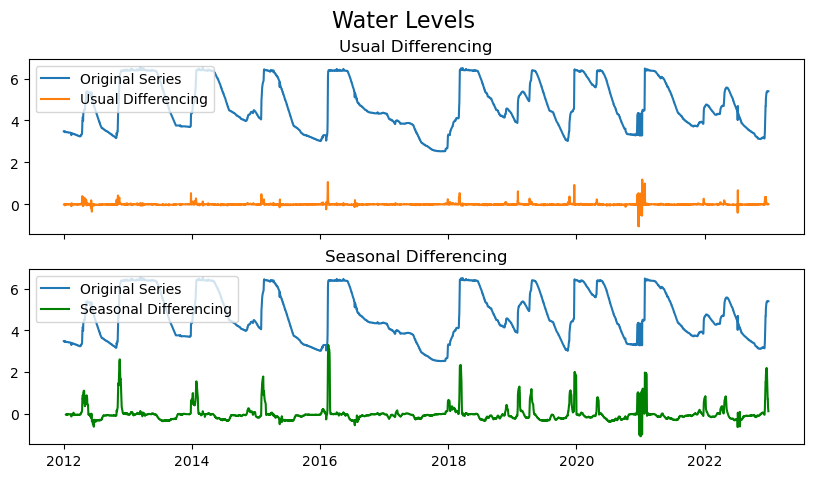

In [103]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Water Levels', fontsize=16)
plt.show()

In [104]:
smodel = pm.auto_arima(
    data,
    start_p=1,
    start_q=1,
    test="adf",
    max_p=3,
    max_q=3,
    m=12,
    start_P=0,
    seasonal=True,
    d=None,
    D=1,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True,
)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=13.34 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3886.484, Time=0.58 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-7936.154, Time=8.54 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=7.93 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3885.333, Time=0.17 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-6795.521, Time=0.40 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=16.44 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=14.57 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=15.74 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=26.76 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=3513.587, Time=1.78 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-8362.643, Time=9.97 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-7174.497, Time=0.67 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-8985.082, Time=32.28 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   :

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 4018
Model:             SARIMAX(2, 0, 1)x(2, 1, 1, 12)   Log Likelihood                4793.671
Date:                            Tue, 20 Jun 2023   AIC                          -9571.342
Time:                                    17:39:43   BIC                          -9520.978
Sample:                                01-01-2012   HQIC                         -9553.490
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.532e-05      0.000      0.174      0.862      -0.001       0.001
ar.L1          0.3155      0.007     44.311      0.000       0.302       0.329
ar.L2          0.6733      0.008     86.463      0.000       0.658       0.689
ma.L1          0.8979      0.005    170.048      0.000       0.888       0.908
ar.S.L12      -0.0423      0.010     -4.046      0.000      -0.063      -0.022
ar.S.L24      -0.0777      0.010     -8.133      0.000      -0.096      -0.059
ma.S.L12      -0.8400      0.009    -92.300      0.000      -0.858      -0.822
sigma2         0.0053   2.23e-05    238.748      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                 101.29   Jarque-Bera (JB):           1125454.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.13   Skew:                             4.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        84.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

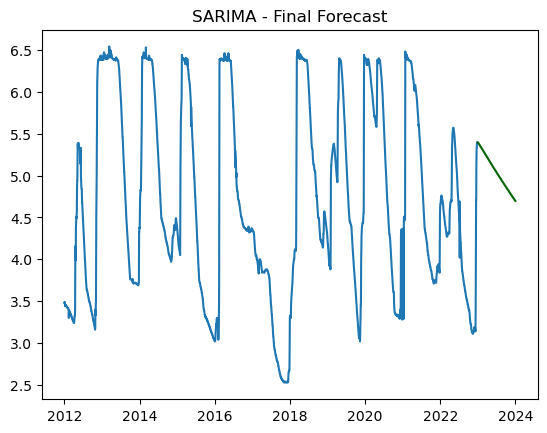

In [110]:
data.index = pd.DatetimeIndex(data.index)

# Forecast
n_periods = 365
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods=n_periods, freq="MS")

# Plot
plt.plot(data)
plt.plot(fitted, color="darkgreen")

plt.title("SARIMA - Final Forecast")
plt.show()

Ahora empezamos con prophet

In [114]:
df = pd.read_csv("C:\\Users\\juanm\\Desktop\\Asignaturas\\Cuarto\\TFG\\Interfaz\\pantanos\\src-tauri\\Data\\Datasets\\AGUASCEBAS.csv", parse_dates=True, dayfirst=True)

In [115]:
df_p = df.reset_index()[["Fecha", "Reserva"]].rename(
    columns={"Fecha": "ds", "Reserva": "y"}
)

In [116]:
import pandas as pd
from prophet import Prophet

model = Prophet()

# Fit the model
model.fit(df_p)

# create date to predict
future_dates = model.make_future_dataframe(periods=365)

# Make predictions
predictions = model.predict(future_dates)

predictions.head()

Importing plotly failed. Interactive plots will not work.
17:50:51 - cmdstanpy - INFO - Chain [1] start processing
17:50:52 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,2.624051,1.673910,3.128280,2.624051,2.624051,-0.230668,-0.230668,-0.230668,-0.001614,-0.001614,-0.001614,-0.229053,-0.229053,-0.229053,0.0,0.0,0.0,2.393383
1,2012-01-02,2.632328,1.722260,3.167543,2.632328,2.632328,-0.212908,-0.212908,-0.212908,0.005589,0.005589,0.005589,-0.218497,-0.218497,-0.218497,0.0,0.0,0.0,2.419419
2,2012-01-03,2.640605,1.727015,3.191154,2.640605,2.640605,-0.204900,-0.204900,-0.204900,0.004690,0.004690,0.004690,-0.209590,-0.209590,-0.209590,0.0,0.0,0.0,2.435705
3,2012-01-04,2.648882,1.787488,3.138225,2.648882,2.648882,-0.200394,-0.200394,-0.200394,0.001808,0.001808,0.001808,-0.202203,-0.202203,-0.202203,0.0,0.0,0.0,2.448487
4,2012-01-05,2.657158,1.805147,3.163751,2.657158,2.657158,-0.196776,-0.196776,-0.196776,-0.000609,-0.000609,-0.000609,-0.196167,-0.196167,-0.196167,0.0,0.0,0.0,2.460383


In [125]:
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mse = mean_squared_error(df["Reserva"], predictions["yhat"][:len(df)])
mape = mean_absolute_percentage_error(df["Reserva"], predictions["yhat"][:len(df)])

print("MSE: " + str(mse.item()) + " MAPE: " + str(mape.item()))

MSE: 0.31280936203317705 MAPE: 9.671622865960222


Eh, no está para nada mal

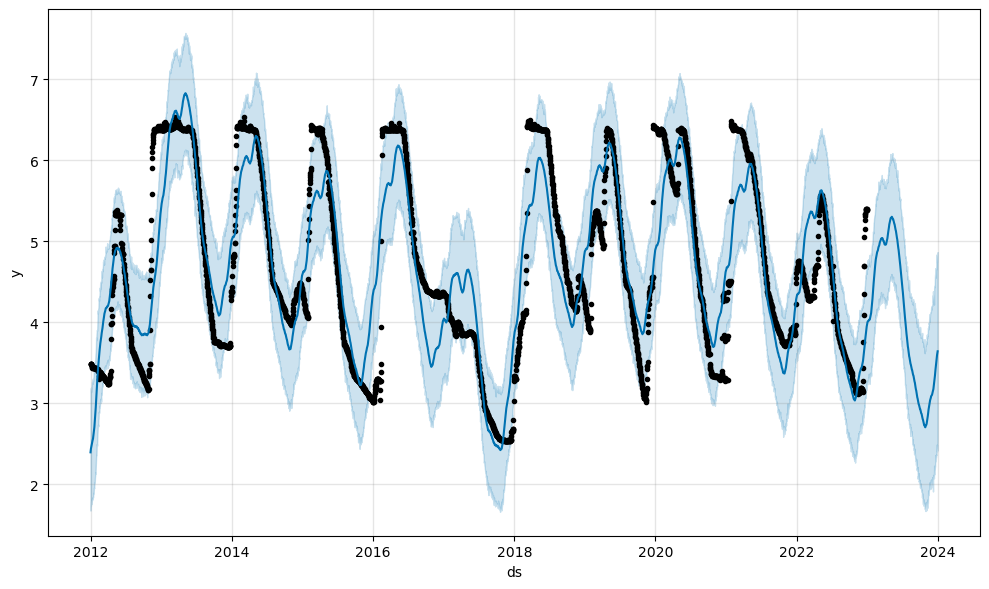

In [126]:
model.plot(predictions);

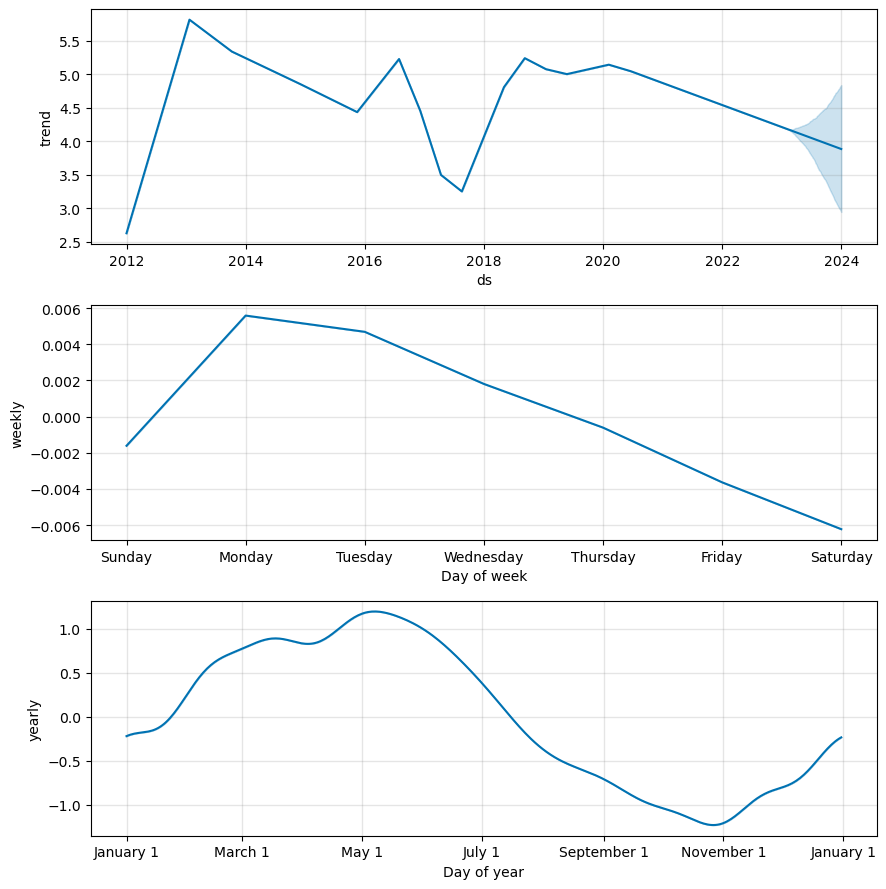

In [127]:
model.plot_components(predictions);

In [133]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation with initial 365 days for the first training data and the cut-off for every 180 days.

df_cv = cross_validation(model, initial='366 days', period='180 days', horizon = '365 days')

# Calculate evaluation metrics
res = performance_metrics(df_cv)

res

  0%|          | 0/19 [00:00<?, ?it/s]

17:59:18 - cmdstanpy - INFO - Chain [1] start processing
17:59:18 - cmdstanpy - INFO - Chain [1] done processing
17:59:19 - cmdstanpy - INFO - Chain [1] start processing
17:59:19 - cmdstanpy - INFO - Chain [1] done processing
17:59:19 - cmdstanpy - INFO - Chain [1] start processing
17:59:20 - cmdstanpy - INFO - Chain [1] done processing
17:59:20 - cmdstanpy - INFO - Chain [1] start processing
17:59:20 - cmdstanpy - INFO - Chain [1] done processing
17:59:20 - cmdstanpy - INFO - Chain [1] start processing
17:59:21 - cmdstanpy - INFO - Chain [1] done processing
17:59:21 - cmdstanpy - INFO - Chain [1] start processing
17:59:21 - cmdstanpy - INFO - Chain [1] done processing
17:59:22 - cmdstanpy - INFO - Chain [1] start processing
17:59:22 - cmdstanpy - INFO - Chain [1] done processing
17:59:23 - cmdstanpy - INFO - Chain [1] start processing
17:59:23 - cmdstanpy - INFO - Chain [1] done processing
17:59:23 - cmdstanpy - INFO - Chain [1] start processing
17:59:24 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,1.222238,1.105549,0.832535,0.175241,0.113667,0.177281,0.467912
1,38 days,1.241072,1.114034,0.839575,0.176384,0.113667,0.178578,0.467229
2,39 days,1.260117,1.122549,0.847148,0.177704,0.114514,0.180028,0.465710
3,40 days,1.277491,1.130262,0.854087,0.178835,0.114932,0.181330,0.462140
4,41 days,1.293429,1.137290,0.860453,0.179724,0.118346,0.182485,0.459254
...,...,...,...,...,...,...,...,...
324,361 days,5.192815,2.278775,1.725947,0.381265,0.256638,0.424064,0.558062
325,362 days,5.158381,2.271207,1.720833,0.379913,0.257245,0.423361,0.558062
326,363 days,5.123667,2.263552,1.714972,0.378376,0.257981,0.422458,0.558062
327,364 days,5.089994,2.256101,1.710373,0.377206,0.258461,0.421869,0.558062


In [134]:
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mse = mean_squared_error(df["Reserva"], df_cv["yhat"][:len(df)])
mape = mean_absolute_percentage_error(df["Reserva"], df_cv["yhat"][:len(df)])

print("MSE: " + str(mse.item()) + " MAPE: " + str(mape.item()))

MSE: 6.073894117311449 MAPE: 48.95845190373359


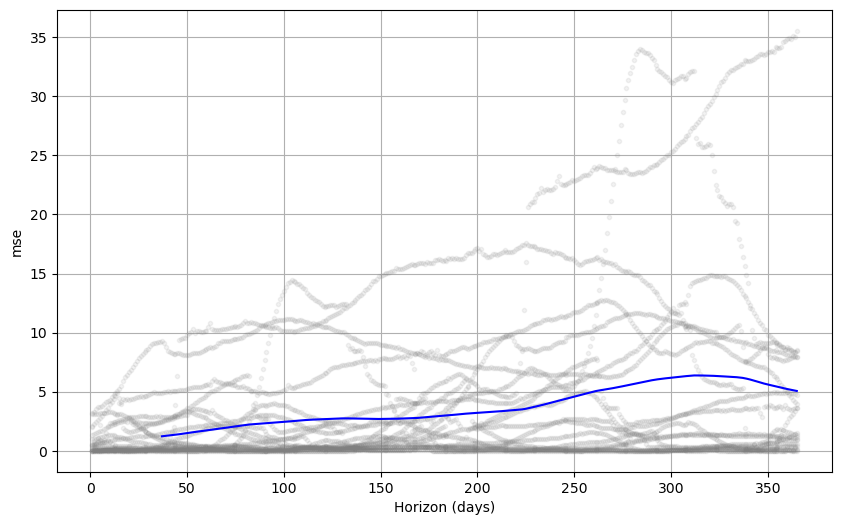

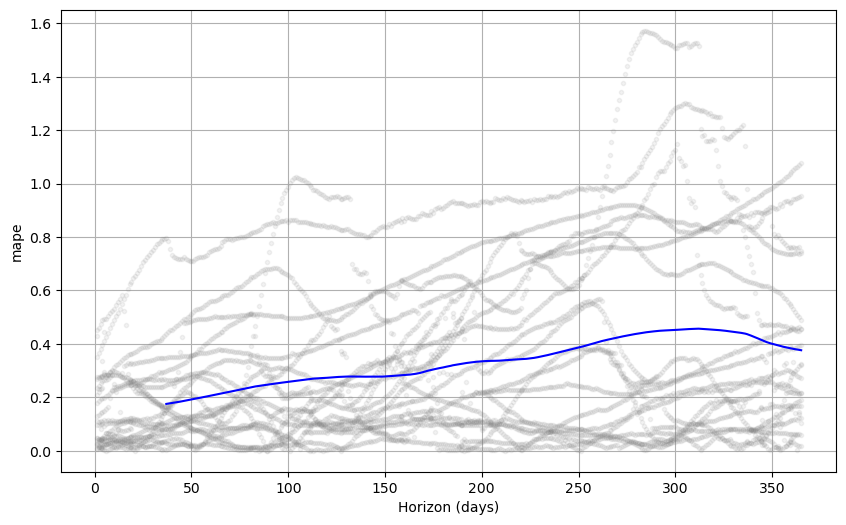

In [135]:
from prophet.plot import plot_cross_validation_metric
#choose between 'mse', 'rmse', 'mae', 'mape', 'coverage'

plot_cross_validation_metric(df_cv, metric= 'mse');
plot_cross_validation_metric(df_cv, metric= 'mape');

Ahora NeuralProphet

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet
import tqdm

In [137]:
df = pd.read_csv("C:\\Users\\juanm\\Desktop\\Asignaturas\\Cuarto\\TFG\\Interfaz\\pantanos\\src-tauri\\Data\\Datasets\\AGUASCEBAS.csv", parse_dates=True, dayfirst=True)
df.rename(columns = {'Fecha':'ds', 'Reserva':'y'}, inplace = True)
df['ds'] = pd.DatetimeIndex(df['ds'])

In [142]:
m = NeuralProphet(epochs=1500)
df_train, df_val = m.split_df(df, freq='W', valid_p = 0.2)
metrics = m.fit(df_train, freq='M', validation_df=df_val)

future = m.make_future_dataframe(df, periods=24, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.975% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency W is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.969% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.50E-01, min: 1.68E+00


  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.50E-01, min: 1.45E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.31E-01
Epoch[1500/1500]: 100%|██████████| 1500/1500 [05:47<00:00,  4.32it/s, SmoothL1Loss=0.012, MAE=0.449, RMSE=0.592, RegLoss=0, MAE_val=1.2, RMSE_val=1.35, SmoothL1Loss_val=0.0607]    
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.975% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.381% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.381% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency D


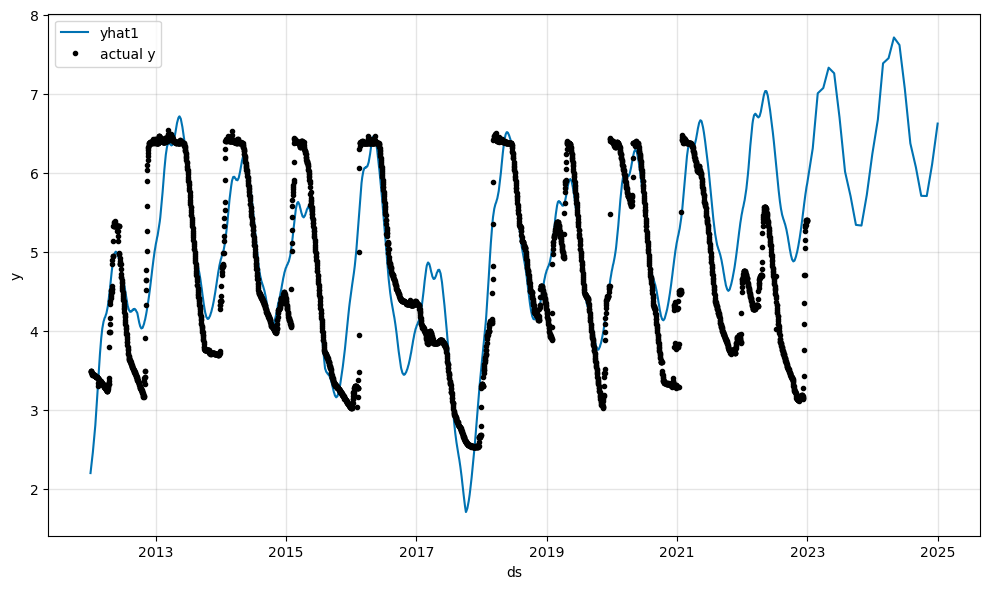

In [143]:
m.plot(forecast);

In [145]:
forecast

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2012-01-01,3.48,2.198919,-1.281081,2.452041,-0.254724,0.001601
1,2012-01-02,3.48,2.220127,-1.259873,2.462339,-0.244036,0.001825
2,2012-01-03,3.49,2.242336,-1.247664,2.472636,-0.233630,0.003330
3,2012-01-04,3.49,2.259993,-1.230007,2.482933,-0.223469,0.000529
4,2012-01-05,3.49,2.277653,-1.212347,2.493230,-0.213513,-0.002063
...,...,...,...,...,...,...,...
4037,2024-08-31,NaN,6.068973,NaN,6.750957,-0.680439,-0.001546
4038,2024-09-30,NaN,5.706985,NaN,6.781556,-1.076396,0.001825
4039,2024-10-31,NaN,5.704623,NaN,6.813175,-1.106489,-0.002063
4040,2024-11-30,NaN,6.105849,NaN,6.843774,-0.736379,-0.001546


In [151]:
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mse = mean_squared_error(df["y"], forecast["yhat1"][:len(df)])
mape = mean_absolute_percentage_error(df["y"], forecast["yhat1"][:len(df)])

print("MSE: " + str(mse.item()) + " MAPE: " + str(mape.item()))

MSE: 0.6500887454874761 MAPE: 14.267930330783463


No son tan buenos como nuestro modelo, pero habría que modificar los hiperparámetros